In [1]:
#import dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Establish CSV path for relevant files
csv_path1 = "../Player Tweets/Albert Haynesworth_Trans 1.csv"
csv_path2 = "../Player Tweets/Albert Haynesworth_Trans 2.csv"
csv_path3 = "../Player Tweets/Albert Haynesworth_Trans 3.csv"

#Establish pd dataframe for each file
alberthaynesworth1 = pd.read_csv(csv_path1, sep=";")
alberthaynesworth2 = pd.read_csv(csv_path2, sep=";", error_bad_lines=False)
alberthaynesworth3 = pd.read_csv(csv_path3, sep=";")

#concatenate data frames 
alberthaynesworth_master = pd.concat([alberthaynesworth1, alberthaynesworth2, alberthaynesworth3])
alberthaynesworth_master

b'Skipping line 6092: expected 10 fields, saw 11\n'


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-03-05 17:41,0,0,Pissed because I kept spelling Albert Hayneswo...,NaN,NaN,NaN,1.285890e+09,https://twitter.com/jasonpcollins/status/12858...
1,NaN,2009-03-05 11:19,0,0,"Redskins Ask Albert Haynesworth To Gain 2, 400...",NaN,NaN,NaN,1.284199e+09,https://twitter.com/JustOneDollar/status/12841...
2,NaN,2009-03-05 10:38,0,0,"@ raczilla Pick one, Drafting Crackman Jones, ...",NaN,@,NaN,1.284017e+09,https://twitter.com/TheGamersLab/status/128401...
3,NaN,2009-03-05 10:29,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283972e+09,https://twitter.com/ShitShat/status/1283972260
4,NaN,2009-03-05 10:11,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283889e+09,https://twitter.com/Razinni/status/1283889355
5,NaN,2009-03-05 09:49,0,0,Onion Daily- Redskins Ask Albert Haynesworth T...,NaN,NaN,NaN,1.283792e+09,https://twitter.com/headlinepost/status/128379...
6,NaN,2009-03-03 20:55,0,0,Lawyer: Haynesworth crash victim can't walk: A...,NaN,NaN,NaN,1.276887e+09,https://twitter.com/ForTheWin/status/1276887212
7,NaN,2009-03-03 14:54,0,0,RT @ williamsonam: New fund to raise cash for ...,NaN,@,NaN,1.275497e+09,https://twitter.com/ChadJarnagin/status/127549...
8,NaN,2009-03-03 14:50,0,0,New fund to raise cash for 25-year-old injured...,NaN,NaN,NaN,1.275482e+09,https://twitter.com/WilliamsonAM/status/127548...
9,NaN,2009-03-03 13:56,0,0,"Haynesworth says Bucs offered $100M, Giants $8...",NaN,NaN,NaN,1.275248e+09,https://twitter.com/ForTheWin/status/1275247568


In [2]:
#fillna's with text to fix error
alberthaynesworth_master["text"].fillna("text", inplace=True)
alberthaynesworth_master.head()


,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,NaN,2009-03-05 17:41,0,0,Pissed because I kept spelling Albert Hayneswo...,NaN,NaN,NaN,1.285890e+09,https://twitter.com/jasonpcollins/status/12858...
1,NaN,2009-03-05 11:19,0,0,"Redskins Ask Albert Haynesworth To Gain 2, 400...",NaN,NaN,NaN,1.284199e+09,https://twitter.com/JustOneDollar/status/12841...
2,NaN,2009-03-05 10:38,0,0,"@ raczilla Pick one, Drafting Crackman Jones, ...",NaN,@,NaN,1.284017e+09,https://twitter.com/TheGamersLab/status/128401...
3,NaN,2009-03-05 10:29,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283972e+09,https://twitter.com/ShitShat/status/1283972260
4,NaN,2009-03-05 10:11,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283889e+09,https://twitter.com/Razinni/status/1283889355


In [3]:
#create list of sentiment scores associated with tweets about relevant player

alberthaynesworth_sent = []

tweets = alberthaynesworth_master["text"]

for index,tweet in alberthaynesworth_master.iterrows():
    results = analyzer.polarity_scores(tweet["text"])
    compound = results["compound"]
    pos = results["pos"]
    neu = results["neu"]
    neg = results["neg"]
        
    # Add sentiments for each tweet into an array
    alberthaynesworth_sent.append({"date": tweet["date"], 
                        "Compound": compound,
                        "Positive": pos,
                        "Negative": neu,
                        "Neutral": neg})
alberthaynesworth_sent



[{'Compound': -0.8074,
  'Negative': 0.451,
  'Neutral': 0.549,
  'Positive': 0.0,
  'date': '2009-03-05 17:41'},
 {'Compound': 0.5267,
  'Negative': 0.726,
  'Neutral': 0.0,
  'Positive': 0.274,
  'date': '2009-03-05 11:19'},
 {'Compound': 0.3952,
  'Negative': 0.831,
  'Neutral': 0.0,
  'Positive': 0.169,
  'date': '2009-03-05 10:38'},
 {'Compound': 0.5267,
  'Negative': 0.815,
  'Neutral': 0.0,
  'Positive': 0.185,
  'date': '2009-03-05 10:29'},
 {'Compound': 0.5267,
  'Negative': 0.815,
  'Neutral': 0.0,
  'Positive': 0.185,
  'date': '2009-03-05 10:11'},
 {'Compound': 0.5267,
  'Negative': 0.746,
  'Neutral': 0.0,
  'Positive': 0.254,
  'date': '2009-03-05 09:49'},
 {'Compound': -0.8625,
  'Negative': 0.586,
  'Neutral': 0.414,
  'Positive': 0.0,
  'date': '2009-03-03 20:55'},
 {'Compound': -0.7003,
  'Negative': 0.746,
  'Neutral': 0.254,
  'Positive': 0.0,
  'date': '2009-03-03 14:54'},
 {'Compound': -0.7003,
  'Negative': 0.721,
  'Neutral': 0.279,
  'Positive': 0.0,
  'date': 

In [4]:
# Convert player sentiments to DataFrame
AH_pd = pd.DataFrame.from_dict(alberthaynesworth_sent)
AH_pd.head()

,Compound,Negative,Neutral,Positive,date
0,-0.8074,0.451,0.549,0.000,2009-03-05 17:41
1,0.5267,0.726,0.000,0.274,2009-03-05 11:19
2,0.3952,0.831,0.000,0.169,2009-03-05 10:38
3,0.5267,0.815,0.000,0.185,2009-03-05 10:29
4,0.5267,0.815,0.000,0.185,2009-03-05 10:11


In [5]:
# merge sentiment data frame and master player tweet file

merged = pd.merge(alberthaynesworth_master, AH_pd, on="date", how="outer")
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive
0,NaN,2009-03-05 17:41,0,0,Pissed because I kept spelling Albert Hayneswo...,NaN,NaN,NaN,1.285890e+09,https://twitter.com/jasonpcollins/status/12858...,-0.8074,0.451,0.549,0.000
1,NaN,2009-03-05 11:19,0,0,"Redskins Ask Albert Haynesworth To Gain 2, 400...",NaN,NaN,NaN,1.284199e+09,https://twitter.com/JustOneDollar/status/12841...,0.5267,0.726,0.000,0.274
2,NaN,2009-03-05 10:38,0,0,"@ raczilla Pick one, Drafting Crackman Jones, ...",NaN,@,NaN,1.284017e+09,https://twitter.com/TheGamersLab/status/128401...,0.3952,0.831,0.000,0.169
3,NaN,2009-03-05 10:29,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283972e+09,https://twitter.com/ShitShat/status/1283972260,0.5267,0.815,0.000,0.185
4,NaN,2009-03-05 10:11,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283889e+09,https://twitter.com/Razinni/status/1283889355,0.5267,0.815,0.000,0.185


In [6]:
# remove time from datetime to be able to groupby an individual day
pd.DatetimeIndex(merged.date).normalize()
merged['date_new'] = pd.DatetimeIndex(merged.date).normalize()
merged.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink,Compound,Negative,Neutral,Positive,date_new
0,NaN,2009-03-05 17:41,0,0,Pissed because I kept spelling Albert Hayneswo...,NaN,NaN,NaN,1.285890e+09,https://twitter.com/jasonpcollins/status/12858...,-0.8074,0.451,0.549,0.000,2009-03-05
1,NaN,2009-03-05 11:19,0,0,"Redskins Ask Albert Haynesworth To Gain 2, 400...",NaN,NaN,NaN,1.284199e+09,https://twitter.com/JustOneDollar/status/12841...,0.5267,0.726,0.000,0.274,2009-03-05
2,NaN,2009-03-05 10:38,0,0,"@ raczilla Pick one, Drafting Crackman Jones, ...",NaN,@,NaN,1.284017e+09,https://twitter.com/TheGamersLab/status/128401...,0.3952,0.831,0.000,0.169,2009-03-05
3,NaN,2009-03-05 10:29,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283972e+09,https://twitter.com/ShitShat/status/1283972260,0.5267,0.815,0.000,0.185,2009-03-05
4,NaN,2009-03-05 10:11,0,0,"Redskins Ask Albert Haynesworth To Gain 2,400 ...",NaN,NaN,NaN,1.283889e+09,https://twitter.com/Razinni/status/1283889355,0.5267,0.815,0.000,0.185,2009-03-05


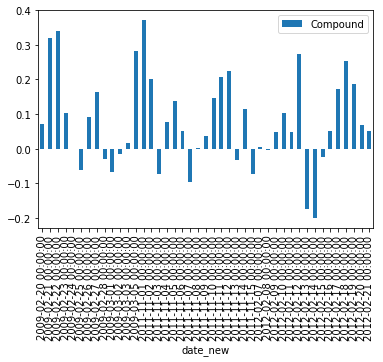

In [7]:
#plot groupby *x axis = day, y axis = compound sentiment score*
grouped = merged.groupby(['date_new'])
grouped.mean().reset_index().plot.bar("date_new", "Compound")
plt.savefig('alberthaynesworth.png')
plt.show()
